# Bike Sharing Analysis
### Problem Statment
    A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

-Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

   -Which variables are significant in predicting the demand for shared bikes.
   
   -How well those variables describe the bike demands.
   
   
##### You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## 1.Reading & Understanding Data

In [1]:
# import the libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Read data

bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bike.shape

(730, 16)

In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [930]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## 2.Data Cleaning

#### a) Missing values

In [931]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### b) check for outliers

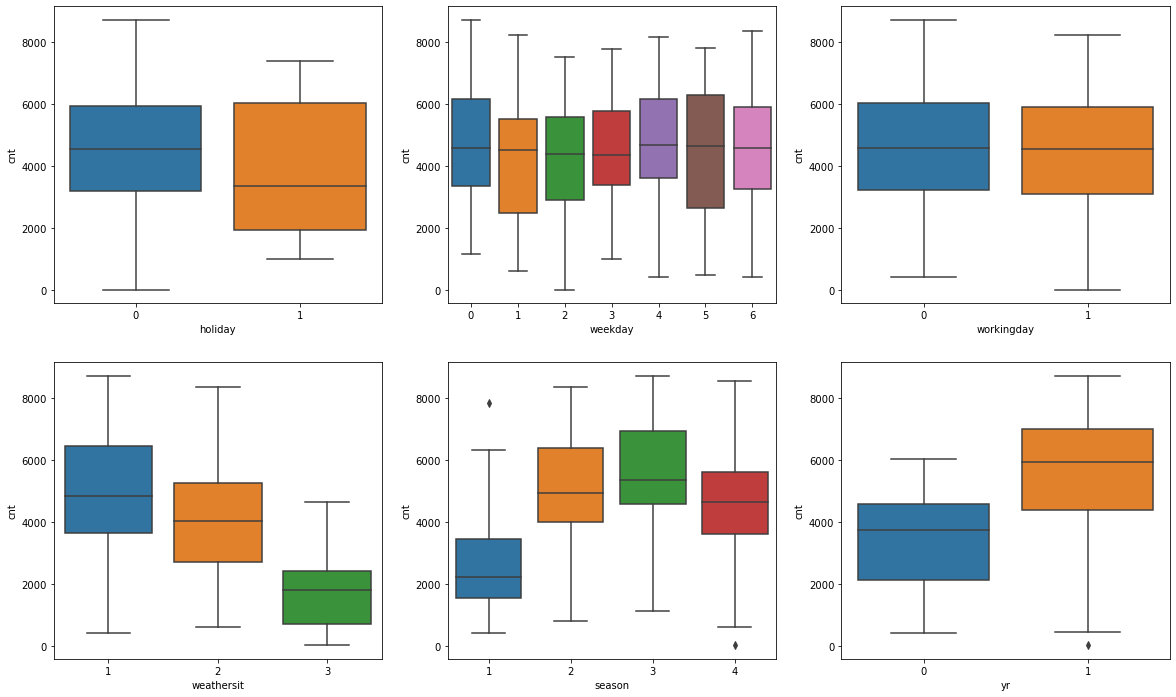

In [932]:
# Check if there are any outliers
    plt.figure(figsize=(20, 12))
    plt.subplot(2,3,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

#### c) Drop the Data unnecessary columns

In [933]:
# Droping the columns which arent required for the model

bike= bike.drop(['instant', 'dteday','casual', 'registered'],axis=1)

In [934]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


##  3.EDA

In [935]:
# convert Numeric  values to data as per the dictionary.
bike.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike.weathersit.replace({1:'Clear',2:'Cloudy',3:'Rain',4:'Thunder & Rain'},inplace = True)

bike.mnth.replace({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',
                  7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'},inplace = True)

bike.weekday.replace({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'},inplace = True)
bike.yr.replace({0: '2018',1: '2019'},inplace = True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Mon,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Tue,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [936]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Mon,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Tue,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Visualise the data for numeric values


<Figure size 720x360 with 0 Axes>

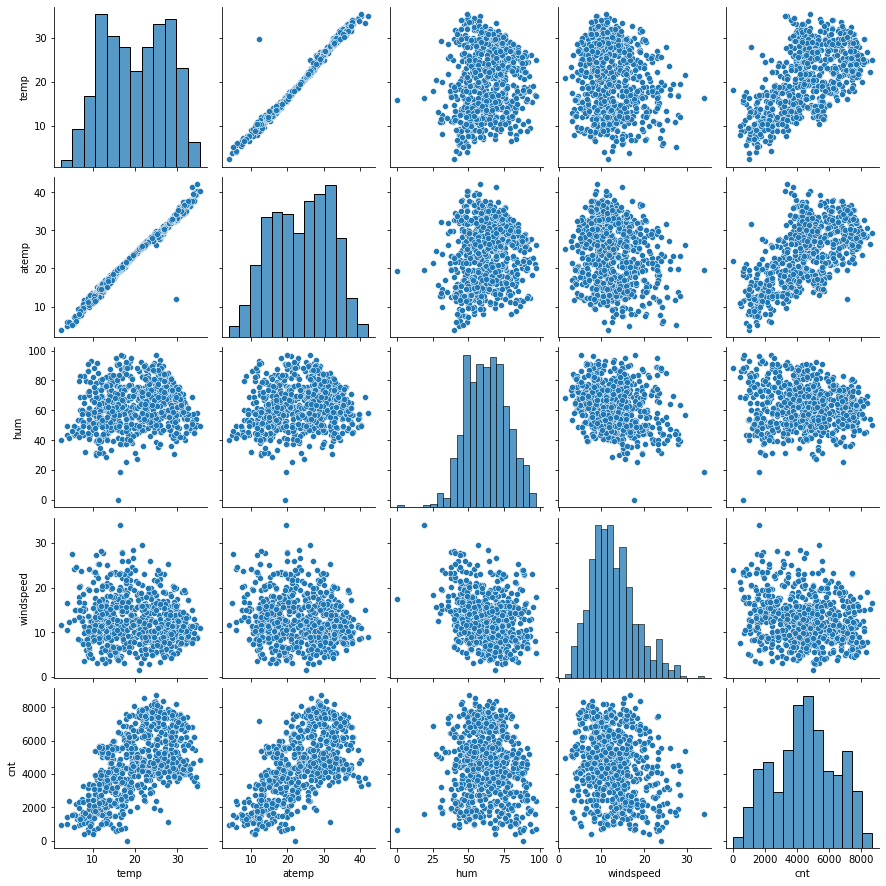

In [937]:
plt.figure(figsize = (10, 5))
sns.pairplot(data = bike,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

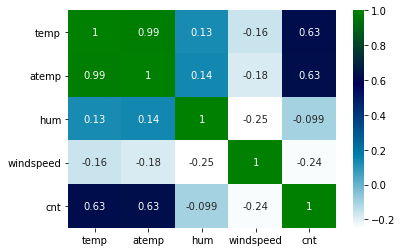

In [938]:
# Checking continuous variables relationship with each other
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='ocean_r', annot = True)
plt.show()

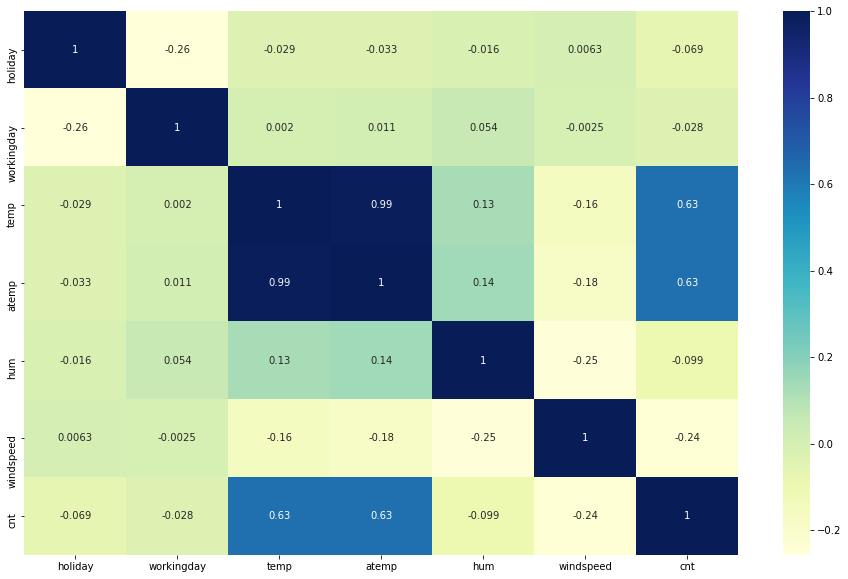

In [939]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

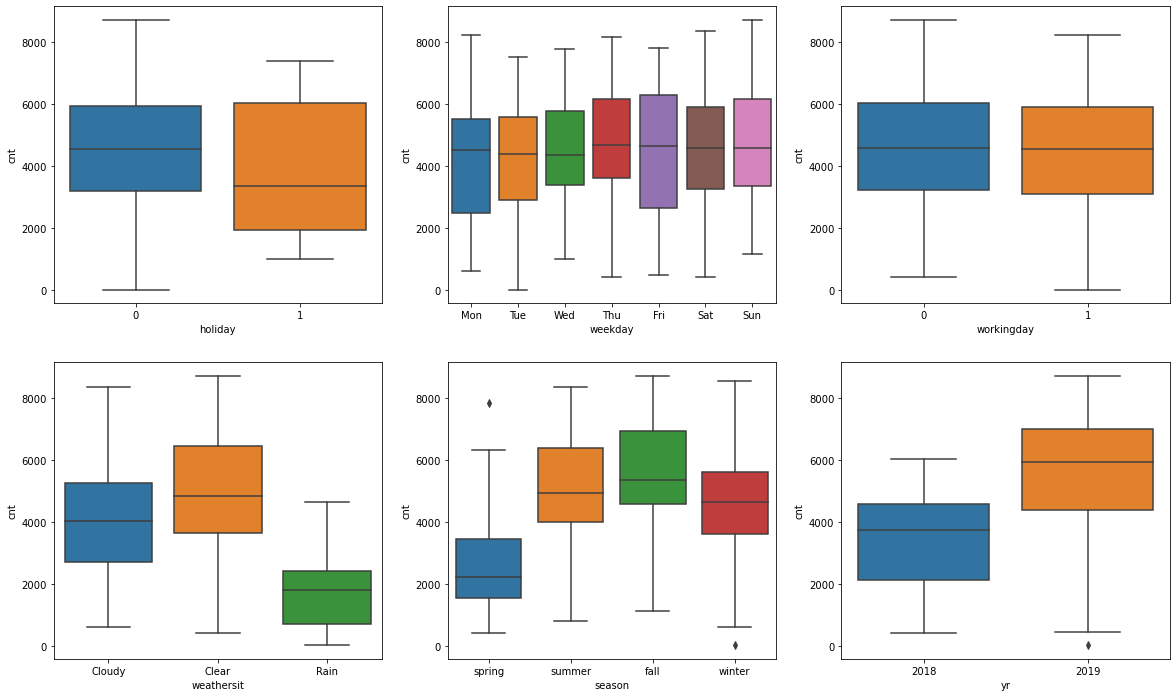

In [940]:
# check for the catogorical var
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

## 4.Creating Dummy Values

In [941]:
bike = pd.get_dummies(data=bike,columns=["season","mnth","weekday"],drop_first=True)
bike = pd.get_dummies(data=bike,columns=["weathersit"])
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Cloudy,weathersit_Rain
0,2018,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,1,0
1,2018,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,1,0
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,1,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,1,0,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [942]:
bike = bike.astype(float)

In [943]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 730 non-null    float64
 1   holiday            730 non-null    float64
 2   workingday         730 non-null    float64
 3   temp               730 non-null    float64
 4   atemp              730 non-null    float64
 5   hum                730 non-null    float64
 6   windspeed          730 non-null    float64
 7   cnt                730 non-null    float64
 8   season_spring      730 non-null    float64
 9   season_summer      730 non-null    float64
 10  season_winter      730 non-null    float64
 11  mnth_Aug           730 non-null    float64
 12  mnth_Dec           730 non-null    float64
 13  mnth_Feb           730 non-null    float64
 14  mnth_Jan           730 non-null    float64
 15  mnth_Jul           730 non-null    float64
 16  mnth_Jun           730 non

In [944]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Clear', 'weathersit_Cloudy',
       'weathersit_Rain'],
      dtype='object')

## 5.Model Building

### Train and Test Data

In [945]:
# Import required Libraries

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor




In [946]:
bike.shape

(730, 31)

In [947]:
# get the target variable
y=bike.pop('cnt')

# Remaing to be Independent variables
X=bike

# F
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [948]:
X_train.shape
X_test.shape

(219, 30)

In [949]:
y_train.shape
y_test.shape

(219,)

### Scaling

In [950]:
#scaling for continuous variables
num_vars = ['temp','atemp','hum','windspeed']

#Using minmax scaler
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [951]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Cloudy,weathersit_Rain
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,2018.499022,0.027397,0.704501,0.555633,0.522053,0.648898,0.343667,0.238748,0.256360,0.236791,...,0.091977,0.152642,0.138943,0.133072,0.140900,0.131115,0.152642,0.630137,0.334638,0.035225
std,0.500489,0.163398,0.456714,0.232202,0.213782,0.146794,0.162310,0.426736,0.437051,0.425529,...,0.289276,0.359994,0.346226,0.339986,0.348259,0.337857,0.359994,0.483240,0.472326,0.184529
min,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000,0.352195,0.340079,0.544225,0.227561,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,0.000000,1.000000,0.568130,0.543410,0.650923,0.314103,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2019.000000,0.000000,1.000000,0.755555,0.697971,0.753113,0.436348,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##  Build RFE Model

In [952]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [953]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [954]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 14),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 11),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 7),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 2),
 ('weekday_Sun', False, 3),
 ('weekday_Thu', False, 16),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 10),
 ('weathersit_Clear', True, 1),
 ('weathersit_Cloudy', False, 6),
 ('weathersit_Rain', True, 1)]

In [955]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sept', 'weathersit_Clear', 'weathersit_Rain'],
      dtype='object')

In [956]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Cloudy'],
      dtype='object')

In [957]:
X_train_lm = X_train[col]

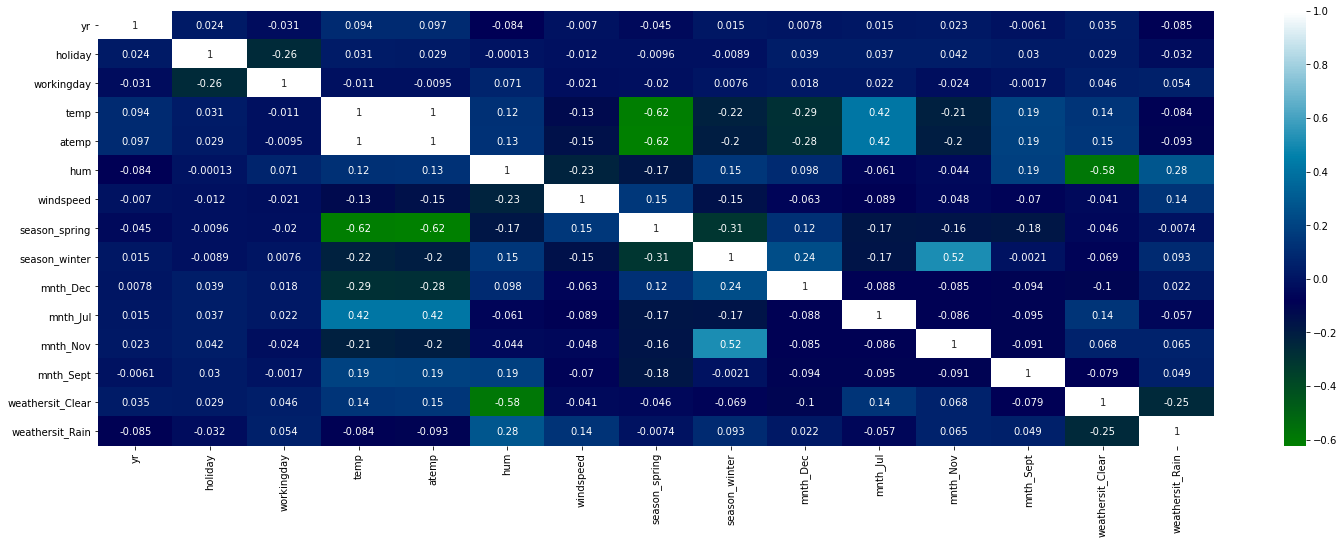

In [958]:
plt.figure(figsize = (25, 8))
sns.heatmap(X_train_lm.corr(), annot = True, cmap="ocean")
plt.show()

## Manual Intervention
### Model 1

In [959]:
# Add a constant
X_train_lm = X_train[col]

X_train_lm = sm.add_constant(X_train_lm)



In [960]:
# running lineat model
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     182.9
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          8.76e-191
Time:                        23:41:56   Log-Likelihood:                -4127.9
No. Observations:                 511   AIC:                             8288.
Df Residuals:                     495   BIC:                             8356.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.021e+06   1.44e+05  

### Model 2    
    - Dropping atemp or temp one by one as it correlated 

In [962]:
# Add a constant
X_train_lm1 = X_train_lm.drop('atemp', 1)
X_train_lm1

X_train_lm1 = sm.add_constant(X_train_lm1)

# running lineat model
lm = sm.OLS(y_train, X_train_lm1).fit()
print(lm.summary())

vif = pd.DataFrame()
X = X_train_lm1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.5
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.64e-191
Time:                        23:41:56   Log-Likelihood:                -4128.9
No. Observations:                 511   AIC:                             8288.
Df Residuals:                     496   BIC:                             8351.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.027e+06   1.44e+05  

In [963]:
X_train_lm2 = X_train_lm.drop('temp', 1)

In [964]:
# Add a constant
X_train_lm2

X_train_lm2 = sm.add_constant(X_train_lm2)

# running lineat model
lm = sm.OLS(y_train, X_train_lm2).fit()
print(lm.summary())

vif = pd.DataFrame()
X = X_train_lm2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          7.40e-192
Time:                        23:41:56   Log-Likelihood:                -4128.1
No. Observations:                 511   AIC:                             8286.
Df Residuals:                     496   BIC:                             8350.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.019e+06   1.44e+05  

### Model 3
    - Model 2 looks good and VIF and p value and R2 are Significant
    - Still we could see if can find better model  month july spring is corelated to Temp attribute , lets see removing it

In [965]:
X_train_lm3 = X_train_lm1.drop('mnth_Nov', 1)

In [966]:
# Add a constant
X_train_lm3

X_train_lm3 = sm.add_constant(X_train_lm3)

# running lineat model
lm = sm.OLS(y_train, X_train_lm3).fit()
print(lm.summary())

vif = pd.DataFrame()
X = X_train_lm3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.4
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          2.89e-190
Time:                        23:41:56   Log-Likelihood:                -4134.7
No. Observations:                 511   AIC:                             8297.
Df Residuals:                     497   BIC:                             8357.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.006e+06   1.45e+05  

## Model 4
    - Model 3 looks good and VIF and p value and R2 are Significant
    - Still we could see if can find better model  month Dec spring is corelated to season winter attribute , lets see
      removing it

In [967]:
X_train_lm3 = X_train_lm3.drop('mnth_Dec', 1)
# Add a constant
X_train_lm3

X_train_lm3 = sm.add_constant(X_train_lm3)

# running lineat model
lm = sm.OLS(y_train, X_train_lm3).fit()
print(lm.summary())

vif = pd.DataFrame()
X = X_train_lm3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     220.0
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          3.24e-190
Time:                        23:41:56   Log-Likelihood:                -4137.6
No. Observations:                 511   AIC:                             8301.
Df Residuals:                     498   BIC:                             8356.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.993e+06   1.46e+05  

### Model 5
    - Could see month july and temp are corelated,We could see removing the july attribute

In [968]:
X_train_lm3 = X_train_lm3.drop('mnth_Jul', 1)
# Add a constant
X_train_lm3

X_train_lm3 = sm.add_constant(X_train_lm3)

# running lineat model
lm = sm.OLS(y_train, X_train_lm3).fit()
print(lm.summary())

vif = pd.DataFrame()
X = X_train_lm3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     232.5
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          2.36e-188
Time:                        23:41:56   Log-Likelihood:                -4144.9
No. Observations:                 511   AIC:                             8314.
Df Residuals:                     499   BIC:                             8365.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.016e+06   1.48e+05  

### Model 6
    - Could see when it rains high negative co-ef

In [969]:
X_train_lm3 = X_train_lm3.drop('weathersit_Rain', 1)
# Add a constant
X_train_lm3

X_train_lm3 = sm.add_constant(X_train_lm3)

# running lineat model
lm = sm.OLS(y_train, X_train_lm3).fit()
print(lm.summary())

vif = pd.DataFrame()
X = X_train_lm3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     225.2
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          5.29e-178
Time:                        23:41:56   Log-Likelihood:                -4172.2
No. Observations:                 511   AIC:                             8366.
Df Residuals:                     500   BIC:                             8413.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.075e+06   1.56e+05  

In [970]:
#Build a model with all columns to select features automatically
def build_model(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [971]:
#Let us build the finalmodel using sklearn
final_col = ['yr','mnth_Sept','holiday','workingday','windspeed','hum','season_winter','weathersit_Clear','season_spring','temp']

#Build a model with above columns
lr = build_model(X_train[final_col],y_train)
print(lr.intercept_,lr.coef_)

-4074644.8820969434 [ 2020.56325147   681.90397887 -1110.42948116  -217.58214532
 -1554.09551109 -1880.4268423    526.27359247   543.17375938
  -888.06261529  4083.58453246]


## 6. Model Evaluation 
### Residucal Analysis

In [972]:
y_train_pred = lr.predict(X_train[final_col])

In [973]:
#Plot a histogram distribution
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

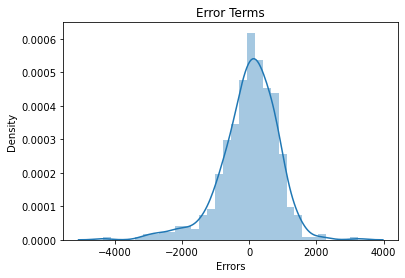

In [974]:
plot_res_dist(y_train, y_train_pred)

### Errors are normally distributed

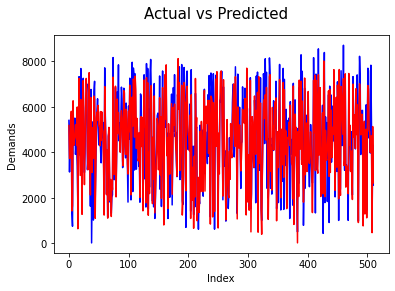

In [975]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

In [976]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8182950107519472

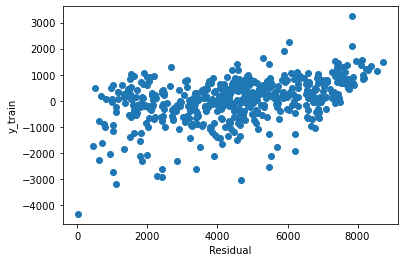

In [977]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

In [978]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [979]:
#Predict the values for test data
y_test_pred = lr.predict(X_test[final_col])

In [980]:
r2_score(y_test,y_test_pred)

0.7873304424392742

Could the R2 is 0.79 ok compare to train set 0.80

### FInal Model Decided

In [981]:
# Add a constant
X_train_lm3

X_train_lm3 = sm.add_constant(X_train_lm3)

# running lineat model
lm = sm.OLS(y_train, X_train_lm3).fit()
print(lm.summary())

vif = pd.DataFrame()
X = X_train_lm3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     225.2
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          5.29e-178
Time:                        23:41:57   Log-Likelihood:                -4172.2
No. Observations:                 511   AIC:                             8366.
Df Residuals:                     500   BIC:                             8413.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.075e+06   1.56e+05  

# Conclusion
## Analysis as per the model

   1. As per the analysis we could see on the month of september good number of usage of bike, We could come with few ideas
      or offer during that period
   2. When the Weather is clear there are more number of usage.
   3. We could see during the working days there are usage of bikes
   4. Winter season and holidays could find the usage and we could go for offer during this time.
   5. Due to epdemic there was nomuch as we go we can improve these factors based on the analysis.
    